In [49]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

data_folder = Path("./titanic")
test_path = data_folder / "test.csv"
train_path = data_folder / "train.csv"

In [2]:
data_original = pd.read_csv(train_path)

In [50]:
data = data_original.copy()

In [4]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S


In [51]:
data.drop(columns=["Name", "PassengerId"], inplace=True)

In [52]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [53]:
for col in data.select_dtypes(exclude="number"):
    print(f"{col}:\n{data[col].value_counts()}\n")

Sex:
male      577
female    314
Name: Sex, dtype: int64

Ticket:
347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
234604      1
112059      1
350043      1
C 7075      1
36967       1
Name: Ticket, Length: 681, dtype: int64

Cabin:
B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
              ..
E68            1
A10            1
C32            1
B86            1
E49            1
Name: Cabin, Length: 147, dtype: int64

Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64



In [54]:
data.drop(columns=["Ticket", "Cabin"], inplace=True)

In [55]:
data["Sex"] = data["Sex"].astype("category")
data["Embarked"] = data["Embarked"].astype("category")

In [56]:
data.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [57]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [58]:
data.dropna(subset=["Embarked"], inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

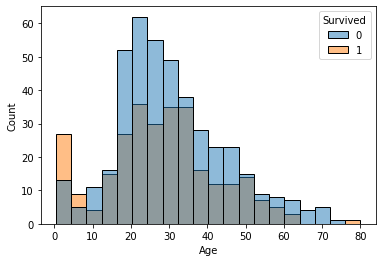

In [59]:
sn.histplot(data=data, x="Age", hue="Survived")

In [60]:
from sklearn.impute import KNNImputer

age_imputer = KNNImputer(n_neighbors=5)
age_imputer.fit(data.select_dtypes("number"))

KNNImputer()

In [61]:
data[[c for c in data.select_dtypes("number").columns]] = age_imputer.transform(data.select_dtypes("number"))

<AxesSubplot:xlabel='Age', ylabel='Count'>

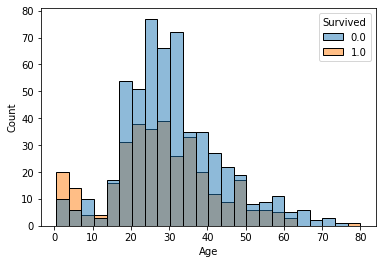

In [62]:
sn.histplot(data=data, x="Age", hue="Survived")

In [63]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
273,0.0,1.0,male,37.0,0.0,1.0,29.7000,C
313,0.0,3.0,male,28.0,0.0,0.0,7.8958,S
611,0.0,3.0,male,29.4,0.0,0.0,7.0500,S
863,0.0,3.0,female,37.0,8.0,2.0,69.5500,S
393,1.0,1.0,female,23.0,1.0,0.0,113.2750,C


Survived
Pclass
Age
SibSp
Parch
Fare


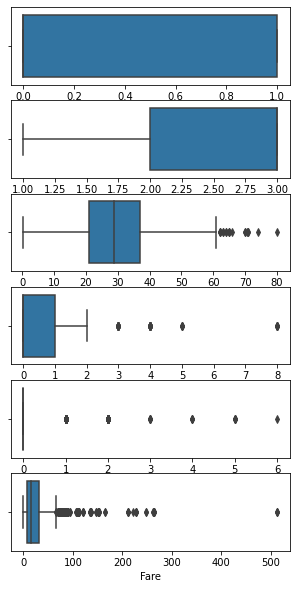

In [64]:
cols = [c for c in data.select_dtypes("number")]

fig, axis = plt.subplots(nrows=len(cols))
fig.set_size_inches(5, 10)

for col, ax in zip(cols, axis):
    print(col)
    sn.boxplot(data=data, x=col, ax=ax)

In [65]:
for col in data.select_dtypes("category"):
    print(f"{col}:\n{data[col].value_counts()}")

Sex:
male      577
female    312
Name: Sex, dtype: int64
Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [66]:
data["Sex"] = data["Sex"].cat.codes

In [72]:
data_train = pd.get_dummies(data, columns=["Embarked"])

In [73]:
data_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
72,0.0,2.0,1,21.0,0.0,0.0,73.5000,0,0,1
774,1.0,2.0,0,54.0,1.0,3.0,23.0000,0,0,1
510,1.0,3.0,1,29.0,0.0,0.0,7.7500,0,1,0
675,0.0,3.0,1,18.0,0.0,0.0,7.7750,0,0,1
395,0.0,3.0,1,22.0,0.0,0.0,7.7958,0,0,1


Готуємо колонки до кластеризації

In [78]:
from sklearn.model_selection import train_test_split

x, y = data_train[data_train.columns.difference(["Survived"])], data_train["Survived"]
x, y

(      Age  Embarked_C  Embarked_Q  Embarked_S     Fare  Parch  Pclass  Sex  \
 0    22.0           0           0           1   7.2500    0.0     3.0    1   
 1    38.0           1           0           0  71.2833    0.0     1.0    0   
 2    26.0           0           0           1   7.9250    0.0     3.0    0   
 3    35.0           0           0           1  53.1000    0.0     1.0    0   
 4    35.0           0           0           1   8.0500    0.0     3.0    1   
 ..    ...         ...         ...         ...      ...    ...     ...  ...   
 886  27.0           0           0           1  13.0000    0.0     2.0    1   
 887  19.0           0           0           1  30.0000    0.0     1.0    0   
 888  26.8           0           0           1  23.4500    2.0     3.0    0   
 889  26.0           1           0           0  30.0000    0.0     1.0    1   
 890  32.0           0           1           0   7.7500    0.0     3.0    1   
 
      SibSp  
 0      1.0  
 1      1.0  
 2      

In [79]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2, stratify=y)

In [86]:
from sklearn.cluster import KMeans, ward_tree, spectral_clustering
from sklearn.metrics import f1_score

In [87]:
clust1 = KMeans(n_clusters=2)
clust1.fit(x_tr)

KMeans(n_clusters=2)

In [88]:
y_res = clust1.predict(x_ts)

In [89]:
f1_score(y_ts, y_res)

0.20253164556962022